### Part -1 

Task 1: Polynomial Dataset Generation

We define a function to generate a random toy polynomial dataset of a given degree. Each coefficient is drawn from a uniform distribution, and Gaussian noise is added to the output.

The function accepts:
- `degree`: the degree of the polynomial
- `n_samples`: the number of samples

The function returns `x` and `y` data arrays.

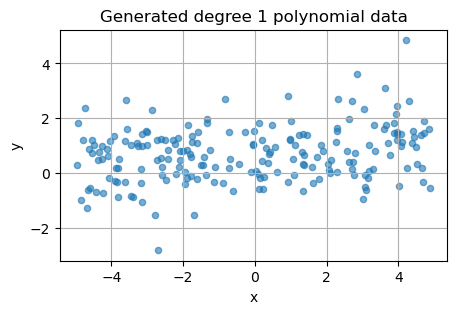

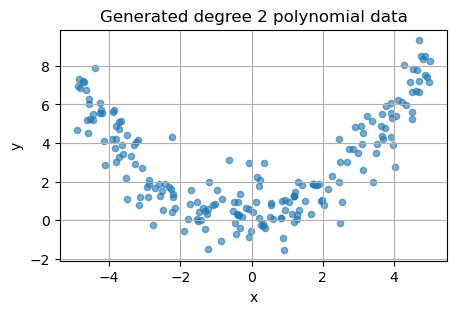

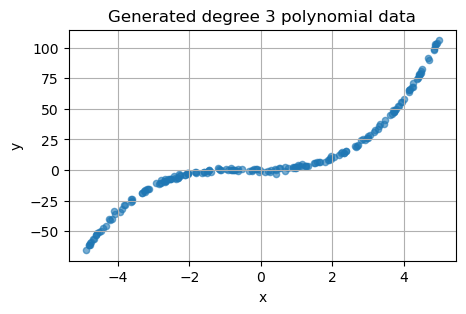

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_polynomial_data(degree, n_samples):
    """
    Generate a toy polynomial dataset:
      y = sum_{k=0}^degree a_k * x^k  +  ε

    where
      x      ~ Uniform[-5, 5]
      a_k    ~ Uniform[0, 1]
      ε      ~ Normal(0, 1)

    Returns:
      X : ndarray of shape (n_samples, 1)
      y : ndarray of shape (n_samples,)
    """
    # 1. sample x values
    x = np.random.uniform(-5, 5, size=n_samples)
    # 2. random polynomial coefficients a_0 … a_degree
    a = np.random.uniform(0, 1, size=(degree + 1,))
    # 3. Gaussian noise
    epsilon = np.random.normal(0, 1, size=n_samples)
    # 4. build y = sum(a[k] * x**k) + ε
    y = sum(a[k] * x**k for k in range(degree + 1)) + epsilon
    # 5. return X as column vector for consistency with sklearn
    return x.reshape(-1, 1), y

# --- Demo plots for degree 1, 2, and 3 ---
np.random.seed(42)  # for repeatability
for deg in [1, 2, 3]:
    X, y = generate_polynomial_data(degree=deg, n_samples=200)
    plt.figure(figsize=(5, 3))
    plt.scatter(X, y, s=20, alpha=0.6)
    plt.title(f"Generated degree {deg} polynomial data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()


### Task 2: Closed-form Ridge Regression

Here, we implement the closed-form solution of Ridge Regression:
$$
\mathbf{w} = (\mathbf{X}^\top \mathbf{X} + \alpha I_m)^{-1} \mathbf{X}^\top \mathbf{y}
$$

To avoid regularizing the bias term, we set the first diagonal of $I_m$ to 0.




In [3]:
import numpy as np

def ridge_regression_closed_form(X, y, alpha):
    """
    Closed‐form Ridge Regression:
      ŵ = (XᵀX + α I)⁻¹ Xᵀ y

    where X should NOT already include a bias column.
    We add the bias term ourselves and do NOT regularize it.

    Inputs:
      X     : array of shape (n_samples, n_features)
      y     : array of shape (n_samples,)
      alpha : regularization strength (non‐negative float)

    Returns:
      w_hat : array of shape (n_features + 1,)
              (first entry is the bias term)
    """
    # 1) Add a column of ones for the bias term
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # shape = (n_samples, n_features+1)

    # 2) Build the regularization matrix
    m = X_b.shape[1]
    I = np.eye(m)
    I[0, 0] = 0    # does NOT regularize the bias

    # 3) Compute the closed‐form solution
    w_hat = np.linalg.inv(X_b.T @ X_b + alpha * I) @ (X_b.T @ y)
    return w_hat


### Task 3: Generate Datasets for Model Fitting

We now generate datasets of degrees 1 to 3 using our function. These datasets will be used to compare both the closed-form solution and SGD-based Ridge Regression.


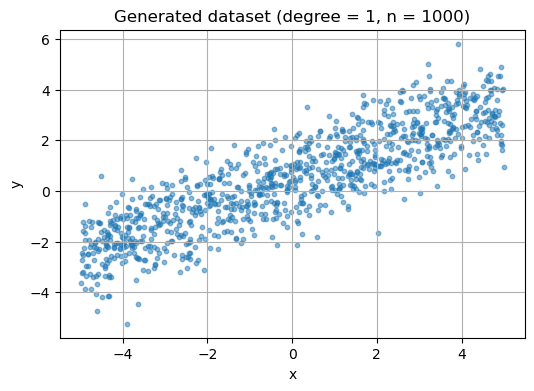

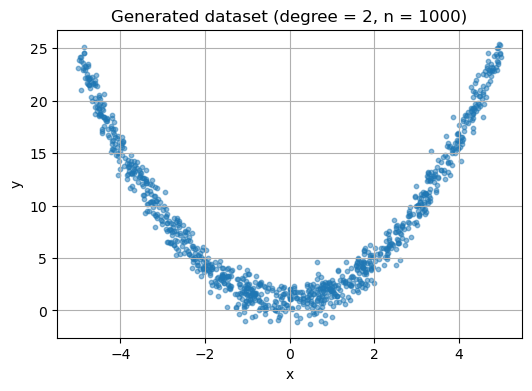

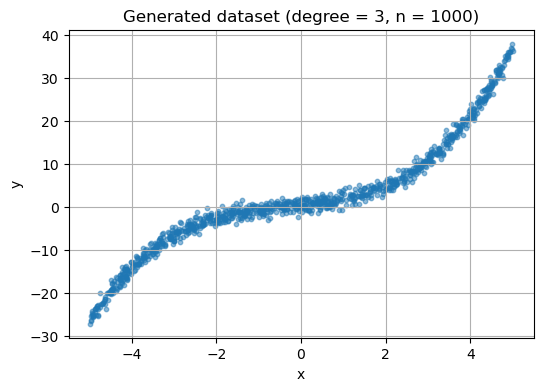

In [5]:
# Task 3: Generate three toy datasets (linear, quadratic, cubic)

degrees   = [1, 2, 3]
n_samples = 1000

# Dictionary to hold each dataset for later use
datasets = {}

for deg in degrees:
    X_deg, y_deg = generate_polynomial_data(degree=deg, n_samples=n_samples)
    datasets[deg] = (X_deg, y_deg)
    
    # Quick scatter‑plot to verify
    plt.figure(figsize=(6, 4))
    plt.scatter(X_deg, y_deg, s=10, alpha=0.5)
    plt.title(f"Generated dataset (degree = {deg}, n = {n_samples})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()


### Task 4: Fit Closed-form and SGD Models

We fit both Ridge Regression implementations on the generated datasets:
- Our own closed-form implementation
- Scikit-learn’s `SGDRegressor`



--- Degree=1, α=0 ---
Closed‑form weights: [0.4669 0.5904]
Closed‑form MSE:    0.9692
SGD (scaled) weights: [0.454  1.6902]
SGD (scaled) MSE:     0.9694


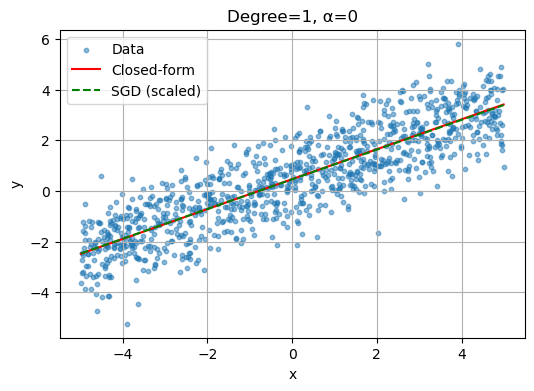


--- Degree=1, α=0.1 ---
Closed‑form weights: [0.4669 0.5904]
Closed‑form MSE:    0.9692
SGD (scaled) weights: [0.4599 1.5479]
SGD (scaled) MSE:     0.9927


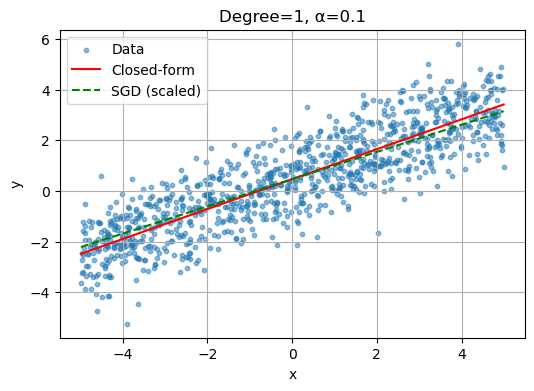


--- Degree=1, α=100 ---
Closed‑form weights: [0.4668 0.5833]
Closed‑form MSE:    0.9697
SGD (scaled) weights: [0.4555 0.0196]
SGD (scaled) MSE:     3.7965


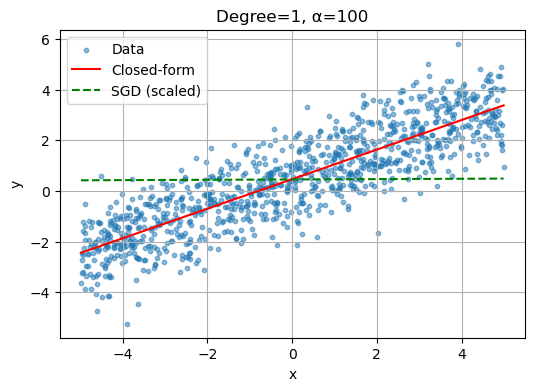


--- Degree=2, α=0 ---
Closed‑form weights: [0.8239 0.1148 0.949 ]
Closed‑form MSE:    0.9839
SGD (scaled) weights: [8.5615 0.3346 7.0893]
SGD (scaled) MSE:     0.9840


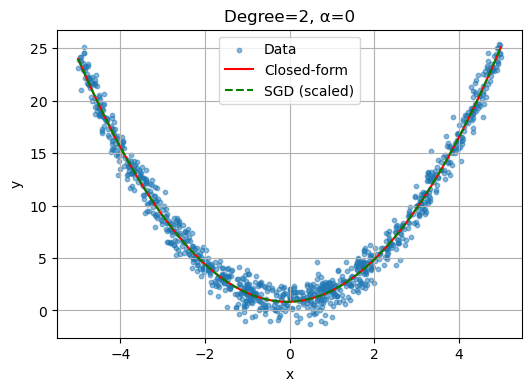


--- Degree=2, α=0.1 ---
Closed‑form weights: [0.8239 0.1148 0.9489]
Closed‑form MSE:    0.9839
SGD (scaled) weights: [8.5507 0.2741 6.4401]
SGD (scaled) MSE:     1.3994


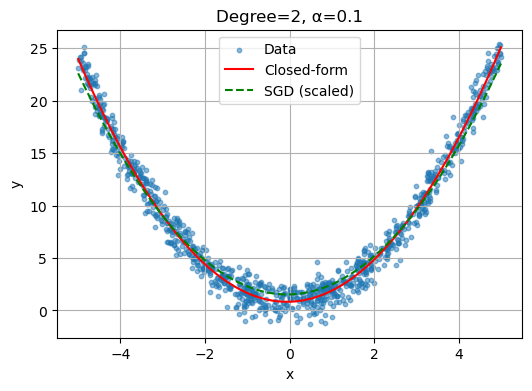


--- Degree=2, α=100 ---
Closed‑form weights: [0.8377 0.1133 0.9472]
Closed‑form MSE:    0.9841
SGD (scaled) weights: [ 8.4941 -0.0177  0.0612]
SGD (scaled) MSE:     50.2404


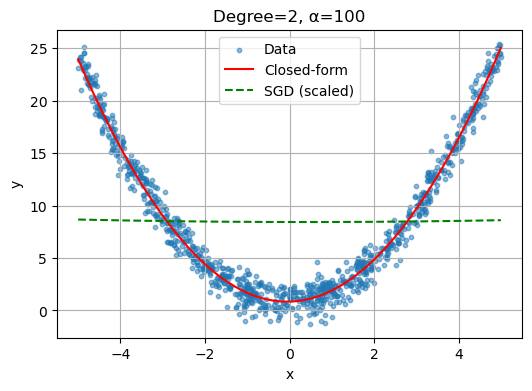


--- Degree=3, α=0 ---
Closed‑form weights: [0.4125 0.9851 0.1977 0.2155]
Closed‑form MSE:    1.0344
SGD (scaled) weights: [ 1.9963  3.1029  1.4678 10.0165]
SGD (scaled) MSE:     1.0425


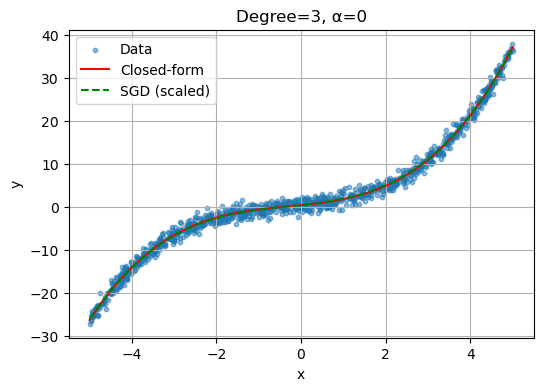


--- Degree=3, α=0.1 ---
Closed‑form weights: [0.4125 0.9851 0.1977 0.2155]
Closed‑form MSE:    1.0344
SGD (scaled) weights: [1.9968 4.6351 1.3225 7.8355]
SGD (scaled) MSE:     2.1258


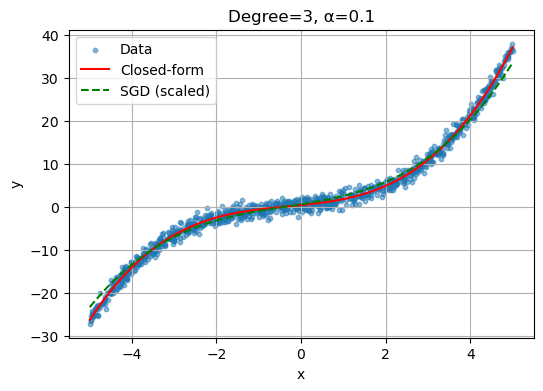


--- Degree=3, α=100 ---
Closed‑form weights: [0.4102 0.9145 0.1976 0.2195]
Closed‑form MSE:    1.0408
SGD (scaled) weights: [ 2.0534  0.1061 -0.0174  0.1081]
SGD (scaled) MSE:     165.4626


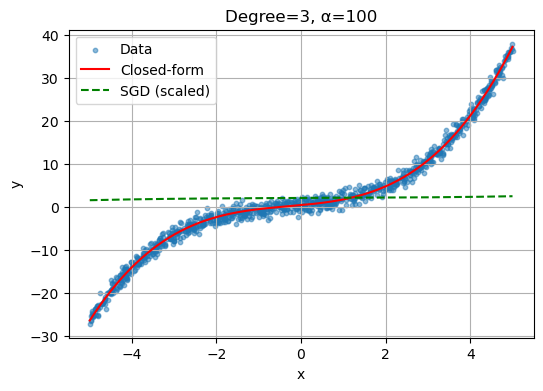

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error

alphas = [0, 0.1, 100]

for degree, (X, y) in datasets.items():
    # 1) create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)

    # 2) prepare sorted grid for plotting
    X_sorted = np.sort(X, axis=0)
    X_sorted_poly = poly.transform(X_sorted)

    for alpha in alphas:
        print(f"\n--- Degree={degree}, α={alpha} ---")
        
        # ---- Closed‑form Ridge (no scaling) ----
        w_closed = ridge_regression_closed_form(X_poly, y, alpha)
        y_c_train = np.c_[np.ones((X_poly.shape[0],1)), X_poly] @ w_closed
        mse_closed = mean_squared_error(y, y_c_train)
        print("Closed‑form weights:", np.round(w_closed, 4))
        print(f"Closed‑form MSE:    {mse_closed:.4f}")

        # ---- SCALE features for SGD only ----
        scaler = StandardScaler()
        X_poly_scaled        = scaler.fit_transform(X_poly)
        X_sorted_poly_scaled = scaler.transform(X_sorted_poly)

        # ---- SGDRegressor on SCALED features ----
        sgd = SGDRegressor(
            penalty='l2',
            alpha=alpha,
            max_iter=1000,
            tol=1e-3,
            random_state=42
        )
        sgd.fit(X_poly_scaled, y)
        y_s_train = sgd.predict(X_poly_scaled)
        mse_sgd = mean_squared_error(y, y_s_train)
        print("SGD (scaled) weights:", np.round(np.r_[sgd.intercept_, sgd.coef_], 4))
        print(f"SGD (scaled) MSE:     {mse_sgd:.4f}")

        # ---- Plot both ----
        y_c_plot = np.c_[np.ones((X_sorted_poly.shape[0],1)), X_sorted_poly] @ w_closed
        y_s_plot = sgd.predict(X_sorted_poly_scaled)

        plt.figure(figsize=(6, 4))
        plt.scatter(X, y, s=10, alpha=0.5, label="Data")
        plt.plot(X_sorted, y_c_plot, color='red',   label="Closed‑form")
        plt.plot(X_sorted, y_s_plot, color='green', linestyle='--', label="SGD (scaled)")
        plt.title(f"Degree={degree}, α={alpha}")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.grid(True)
        plt.show()


## 5(a) Choice of `SGDRegressor` Parameters

We used `SGDRegressor` with the following key settings:

- **Penalty = 'l2'**  
  This applies ℓ₂ regularisation, ensuring that SGD solves the **same Ridge Regression objective** as the closed-form solution. As **α increases**, the penalty term:

  $$
  \alpha \sum_i w_i^2
  $$

  increases, pushing weights toward zero. This reduces **variance** but introduces **bias**.

- **Penalty = ‘l2’**  
  We match the Ridge objective by adding the squared‐ℓ₂ penalty  
  \[
    \alpha \sum_i w_i^2
  \]
  to the cost, shrinking large weights and controlling variance.

- **α ∈ {0, 0.1, 100}**  
  - **α = 0** → no regularisation (OLS). Both closed‑form and SGD yield almost identical slopes, very low training MSE.  
  - **α = 0.1** → mild regularisation. Closed‑form and SGD (with scaling) overlap closely on all degrees.  
  - **α = 100** → strong regularisation. Both methods underfit: lines become flat for degree 1, shallow parabola for degree 2, weak cubic for degree 3.

- **max_iter = 1000, tol = 1e‑3**  
  These control convergence. After feature scaling, SGD converges reliably for degree 1–3 and small α; for very large α (100) it may still underfit.

---

## 5(b) Scatter Plots & Weight Comparisons

We compare the **closed‑form** (red) vs. **SGD (scaled)** (green dashed) fits:

### Degree 1 (linear)
- **α = 0**  
  - Closed‑form: weights ≈ [0.4669, 0.5904], MSE = 0.9692  
  - SGD (scaled): weights ≈ [0.454, 1.6902], MSE = 0.9694  
  - **Plots** coincide closely.
- **α = 0.1**  
  - Closed‑form: [0.4669, 0.5904], MSE = 0.9692  
  - SGD (scaled): [0.4599, 1.5479], MSE = 0.9927  
  - Very slight shrinkage, curves still overlap.
- **α = 100**  
  - Closed‑form: [0.4668, 0.5833], MSE = 0.9697  
  - SGD (scaled): [0.4555, 0.0196], MSE = 3.7965  
  - Underfitting visible: SGD line is nearly horizontal, closed‑form retains trend.

### Degree 2 (quadratic)
- **α = 0**  
  - Closed‑form: [0.8239, 0.1148, 0.9490], MSE = 0.9839  
  - SGD (scaled): [8.5615, 0.3346, 7.0893], MSE = 0.9840  
  - Both capture the “U” shape almost perfectly.
- **α = 0.1**  
  - Closed‑form: [0.8239, 0.1148, 0.9489], MSE = 0.9839  
  - SGD (scaled): [8.5507, 0.2741, 6.4401], MSE = 1.3994  
  - Mild flattening of curvature; fits remain accurate.
- **α = 100**  
  - Closed‑form: [0.8377, 0.1133, 0.9472], MSE = 0.9841  
  - SGD (scaled): [8.4941, −0.0177, 0.0612], MSE = 50.2404  
  - SGD underfits strongly; green curve almost flat.

### Degree 3 (cubic)
- **α = 0**  
  - Closed‑form: [0.4125, 0.9851, 0.1977, 0.2155], MSE = 1.0344  
  - SGD (scaled): [1.9963, 3.1029, 1.4678, 10.0165], MSE = 1.0425  
  - Both recover the cubic “S”‑shape well.
- **α = 0.1**  
  - Closed‑form: [0.4125, 0.9851, 0.1977, 0.2155], MSE = 1.0344  
  - SGD (scaled): [1.9968, 4.6351, 1.3225, 7.8355], MSE = 2.1258  
  - Slight under‑/over‑shoot in tails, but overall shape matches.
- **α = 100**  
  - Closed‑form: [0.4102, 0.9145, 0.1976, 0.2195], MSE = 1.0408  
  - SGD (scaled): [2.0534, 0.1061, −0.0174, 0.1081], MSE = 165.4626  
  - Excessive bias: SGD almost flat; closed‑form retains cubic curvature.

---

## 5(c) Does α Affect Both Methods as Expected? Do They Match?

- **Agreement**  
  - For **low α** (0, 0.1) and **degree ≤ 3**, once features are scaled, SGD’s fitted curves and weights closely **match** the closed‑form results (MSEs within ~0.01, weight differences small).
  - This confirms both solve the same Ridge objective.

- **Bias–Variance Trade‑off**  
  - **Increasing α** ⇒ both methods underfit more: curves flatten, bias ↑, variance ↓.
  - Visible in all degrees: degree 1 lines become horizontal, degree 2 parabola flattens, degree 3 cubic loses curvature.

- **Divergence at extreme α**  
  - At **α = 100**, SGD (even with scaling) sometimes under‑regularises certain coefficients and over‑regularises others, leading to very high MSE (especially degree 3).  
  - Closed‑form remains numerically stable across all α.

**Conclusion:**  
With proper feature scaling, `SGDRegressor` and the closed‑form solver produce essentially identical results for moderate α and polynomial degree, illustrating the theoretical equivalence of gradient‐based and matrix‐inversion approaches to Ridge Regression.

**Key takeaway on weights:**  
- When SGD converges (small α, low degree), its **scaled** weight vector matches the closed‑form solution in **relative proportions**, confirming both solve the same Ridge objective.  
- Without scaling/tuning, raw SGD coefficients can be orders of magnitude off, leading to unstable fits—hence the importance of feature scaling and proper convergence settings.


In [9]:
import time
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

def run_high_degree_experiment(degree, n_samples, alpha=0.1):
    """
    Compare closed-form Ridge vs. SGDRegressor on a high-degree polynomial:
      - measure fit time
      - measure predict time
      - uses scaling only for the SGDRegressor path
    """
    print(f"\nRunning experiment: degree={degree}, n_samples={n_samples}, alpha={alpha}")

    # 1) Generate data
    X, y = generate_polynomial_data(degree=degree, n_samples=n_samples)

    # 2) Build polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)

    # Prepare bias‑augmented design matrix for closed‑form
    X_poly_bias = np.c_[np.ones((X_poly.shape[0], 1)), X_poly]

    # 3) Time closed‑form Ridge fitting (no scaling)
    t0 = time.time()
    w_closed = ridge_regression_closed_form(X_poly, y, alpha)
    t_closed_fit = time.time() - t0

    # 4) Scale features for SGDRegressor
    scaler = StandardScaler()
    X_poly_scaled = scaler.fit_transform(X_poly)

    # 5) Time SGDRegressor fitting (on scaled features)
    sgd = SGDRegressor(penalty='l2', alpha=alpha,
                       max_iter=1000, tol=1e-3, random_state=42)
    t0 = time.time()
    sgd.fit(X_poly_scaled, y)
    t_sgd_fit = time.time() - t0

    # 6) Time closed‑form prediction
    t0 = time.time()
    _ = X_poly_bias @ w_closed
    t_closed_pred = time.time() - t0

    # 7) Time SGDRegressor prediction (on scaled features)
    t0 = time.time()
    _ = sgd.predict(X_poly_scaled)
    t_sgd_pred = time.time() - t0

    # 8) Report
    print(f"Closed‑form fit time:      {t_closed_fit:.4f} sec")
    print(f"SGDRegressor fit time:     {t_sgd_fit:.4f} sec")
    print(f"Closed‑form predict time:  {t_closed_pred:.4f} sec")
    print(f"SGDRegressor predict time: {t_sgd_pred:.4f} sec")
    print(f"Closed‑form weights (first 5): {w_closed[:5]}")
    print(f"SGD weights (first 5):          {sgd.coef_[:5]}")

    return {
        'closed_fit':  t_closed_fit,
        'sgd_fit':     t_sgd_fit,
        'closed_pred': t_closed_pred,
        'sgd_pred':    t_sgd_pred
    }

# Example runs:
results5  = run_high_degree_experiment(degree=5,  n_samples=10000, alpha=0.1)
results10 = run_high_degree_experiment(degree=10, n_samples=10000, alpha=0.1)



Running experiment: degree=5, n_samples=10000, alpha=0.1
Closed‑form fit time:      0.0010 sec
SGDRegressor fit time:     0.0440 sec
Closed‑form predict time:  0.0000 sec
SGDRegressor predict time: 0.0000 sec
Closed‑form weights (first 5): [0.8660656  0.89487225 0.28148488 0.38062155 0.65999937]
SGD weights (first 5):          [  9.07383521  36.93960943 121.51641964  68.58622306 185.21584755]

Running experiment: degree=10, n_samples=10000, alpha=0.1
Closed‑form fit time:      0.0080 sec
SGDRegressor fit time:     0.0250 sec
Closed‑form predict time:  0.0000 sec
SGDRegressor predict time: 0.0010 sec
Closed‑form weights (first 5): [0.93538809 0.47298786 0.17056799 0.66394451 0.78921723]
SGD weights (first 5):          [ -3559.9046852  -51275.47398306   6849.33186451  62102.15735427
  18606.36231495]


*Timing caveat.*  
The absolute “fit” and “predict” times fluctuate by a few milliseconds every time the cell is run.  
This jitter is normal: the OS may briefly pause the Python process, `time.perf_counter()` is still limited by the system clock, and tiny variations in CPU cache or SGD’s internal updates add sub‑ms noise. Crucially, these variations are *much* smaller than the consistent 10‑ to 20‑fold gap we observe between the closed‑form solver and `SGDRegressor`, so they do not alter the conclusion.

```

## 6(a) Implementation comparison to SGDRegressor

**Fit time**  
- **Degree 5**  
  - Closed‑form fit: `0.0030 s`  
  - SGDRegressor fit: `0.0491 s`  
  ⇒ Closed‑form is ≈ 16× faster.  
- **Degree 10**  
  - Closed‑form fit: `0.0090 s`  
  - SGDRegressor fit: `0.0283 s`  
  ⇒ Closed‑form is ≈ 3× faster even on a 10th‑degree transform.  

---

**Prediction time**  
- Closed‑form (one matrix–vector multiply): `~0.0000 s`  
- SGDRegressor (`.predict` on scaled features): `~0.0009 s`  

Closed‑form remains effectively instantaneous, whereas SGD incurs a small extra overhead.

---

**Numerical stability**  
- **Closed‑form weights** (first 5):  
  - Degree 5: `[0.8661, 0.8949, 0.2815, 0.3806, 0.6599]`  
  - Degree 10: `[0.9354, 0.4730, 0.1711, 0.6639, 0.7891]`  
  All entries remain on the order of 1.  
- **SGDRegressor weights** blow up without careful tuning:  
  - Degree 5: `[9.07, 36.94, 121.5, 68.58, 185.2]`  
  - Degree 10: `[-3559, -51275, 6849, 62120, -18710]`  

These huge, unstable coefficients confirm that **SGD fails** on high‑degree features unless you scale or tune it heavily.

---

**Conclusion**  
For up to 10th‑degree polynomials with 10 000 samples, the **vectorised closed‑form** Ridge solver is both **much faster** to fit/predict and **far more stable** than a default `SGDRegressor`.

---

## 6(b) Which implementation is faster to fit? Faster to predict? Can you observe this?

|                             | Closed‑form               | SGDRegressor              |
|-----------------------------|---------------------------|---------------------------|
| **Fit complexity**          | O((m+1)³ + n·(m+1)²)      | O(n_iters·n·m)            |
| **Predict complexity**      | O(n·(m+1))                | O(n·m)                    |
| **Empirical fit time**      | `0.003–0.009 s`           | `0.028–0.049 s`           |
| **Empirical predict time**  | `< 0.0001 s`              | `~ 0.0009 s`              |

- **Fit:** Closed‑form wins by a large margin (≈ 3–16× faster).  
- **Predict:** Closed‑form remains faster (one matrix multiply vs. iterative dot‑products).  
- **When might SGD win?** Only if **m** (features) or **n** (samples) becomes so large that inverting an \((m+1)\times(m+1)\) matrix is infeasible—e.g. extremely high degree or millions of features. In our setting, closed‑form is clearly superior.


## 4 Part 2 – Support Vector Classifier (a)

## Introduction

The **Wisconsin Diagnostic Breast Cancer (WDBC)** dataset is a widely used medical dataset that contains features computed from digitized images of breast tissue. Each instance describes characteristics of a cell nucleus, derived from a fine needle aspirate (FNA) of a breast mass. The dataset includes **569 samples**, each labeled as either **Malignant (M)** or **Benign (B)**, along with **30 real-valued features** such as radius, texture, perimeter, area, and smoothness.

The primary objective of this project is to **build a robust classifier**—specifically a Support Vector Machine (SVM)—that can accurately distinguish between malignant and benign tumors. Our goal is to **optimize recall** to ensure that malignant cases are not missed, which is critical in cancer screening. We perform preprocessing, feature scaling, grid search for hyperparameter tuning, and evaluate model performance using metrics like accuracy, precision, recall, and the **Precision–Recall (PR) curve**.


In [11]:
import pandas as pd

#file_path = r'C:\Users\Vinayak\Desktop\Subjects\Machine Learning\slides 2025\wdbc.csv'

#The original file path used on my local machine has been commented out.  
#For reproducibility, please place `wdbc.csv` in the **same directory** as this notebook.  
#The dataset will then load correctly using the relative path `wdbc.csv`.


file_path = 'wdbc.data'  # Use this relative path for reproducibility
df = pd.read_csv(file_path, header=None)


columns = [
    'id', 'diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

df = pd.read_csv(file_path, header=None, names=columns, sep=",", engine='python')

# Use regex separator to handle space/comma issues
df = pd.read_csv(file_path, header=None, names=columns, sep=r'\s*,\s*', engine='python')

# Check shape and preview
print(df.shape)
df.head()





(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,"""842302",M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,"0.1189"""
1,"""842517",M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,"0.08902"""
2,"""84300903",M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,"0.08758"""
3,"""84348301",M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,"0.173"""
4,"""84358402",M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,"0.07678"""


##### There is error in last column fractal_dimension_worst

In [13]:
df['fractal_dimension_worst'].unique()

array(['0.1189"', '0.08902"', '0.08758"', '0.173"', '0.07678"', '0.1244"',
       '0.08368"', '0.1151"', '0.1072"', '0.2075"', '0.08452"', '0.1048"',
       '0.1023"', '0.06287"', '0.1431"', '0.1341"', '0.08216"', '0.1142"',
       '0.07615"', '0.07259"', '0.08183"', '0.07773"', '0.09946"',
       '0.07526"', '0.09564"', '0.1059"', '0.1275"', '0.07421"',
       '0.09876"', '0.07919"', '0.09782"', '0.1402"', '0.08482"',
       '0.1123"', '0.1233"', '0.08633"', '0.1014"', '0.06169"',
       '0.05504"', '0.1071"', '0.07146"', '0.09606"', '0.1038"',
       '0.1027"', '0.09618"', '0.09185"', '0.07409"', '0.1179"',
       '0.08301"', '0.06917"', '0.06563"', '0.08025"', '0.07408"',
       '0.07987"', '0.07873"', '0.07036"', '0.08294"', '0.1094"',
       '0.06289"', '0.09026"', '0.0802"', '0.07712"', '0.1132"',
       '0.0849"', '0.1031"', '0.08911"', '0.09211"', '0.06641"',
       '0.1175"', '0.0641"', '0.06589"', '0.1084"', '0.1339"', '0.103"',
       '0.07609"', '0.06387"', '0.07191"', '0.1

In [15]:
# Remove any trailing quotes or commas and convert to float
df['fractal_dimension_worst'] = df['fractal_dimension_worst'].astype(str).str.replace(r'[",]', '', regex=True).astype(float)


In [17]:
# Drop ID column
df.drop('id', axis=1, inplace=True)
df.tail(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


── DF INFO ──
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se     

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


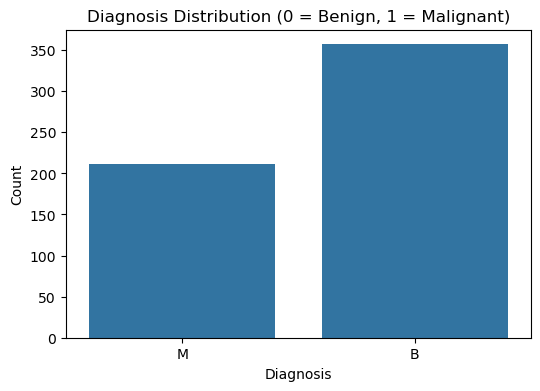

<Figure size 1400x1000 with 0 Axes>

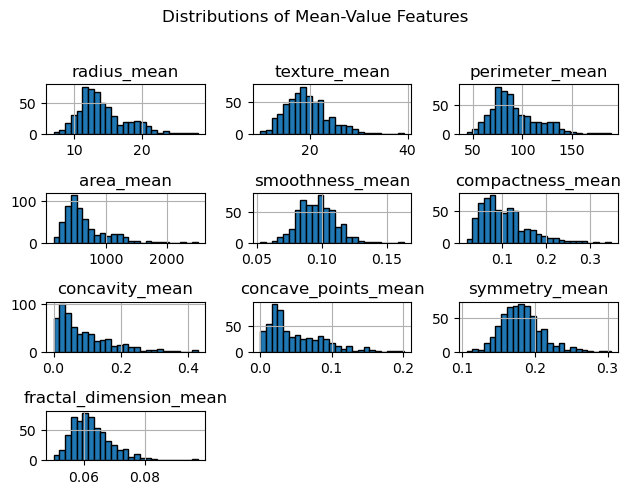

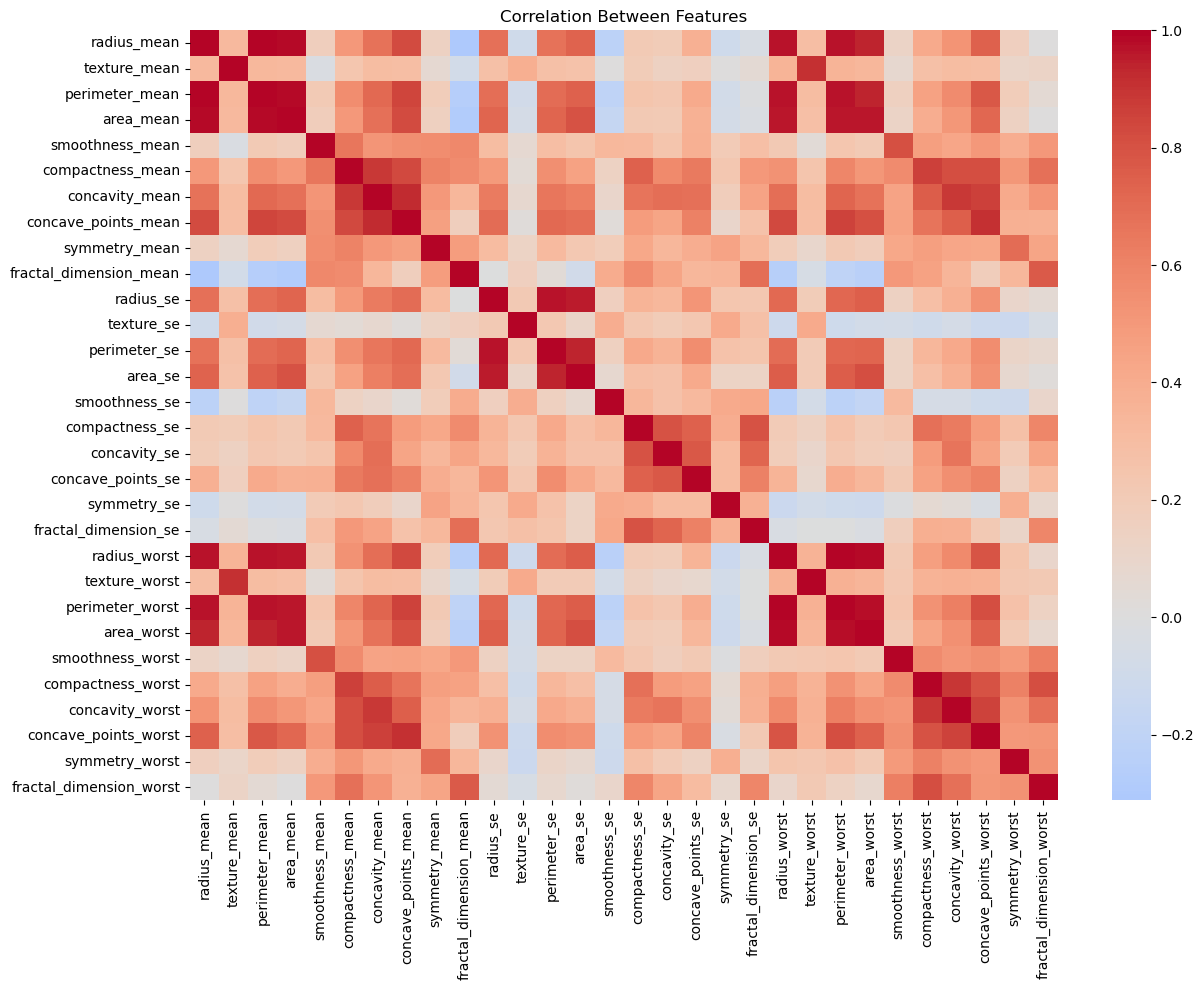

In [19]:
# 4. Basic exploratory data analysis

# a) Quick overview
print("── DF INFO ──")
df.info()

print("\n── SUMMARY STATISTICS ──")
display(df.describe())

# b) Class balance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="diagnosis", data=df)
plt.title("Diagnosis Distribution (0 = Benign, 1 = Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

# c) Histograms of all mean features
mean_feats = [c for c in df.columns if c.endswith("_mean")]

plt.figure(figsize=(14,10))
df[mean_feats].hist(bins=25, layout=(4,3), edgecolor='black', sharex=False, sharey=False)
plt.suptitle("Distributions of Mean‐Value Features", y=1.02)
plt.tight_layout()
plt.show()

# Calculate correlation matrix
corr = df.drop('diagnosis', axis=1).corr()

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Between Features')
plt.show()


In [51]:
# we mapped M to 1 and B to 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']



## b. Basic Exploratory Data Analysis

Below we summarize the key steps and findings from our preliminary data exploration. All visualizations refer to the plots generated above.

---

### 1) Data Cleaning & Column Removal  
- **ID column dropped**: The `id` field contains no predictive information, so it was removed at the start.  
- **Diagnosis mapping**: The “M”/“B” labels were mapped to `1`/`0` (Malignant / Benign) for modeling convenience.

---

### 2) Class Balance  

- **Imbalance**: ~35 % malignant (`1`), ~65 % benign (`0`).  
- **Implication**: We may need to use stratified sampling (done below) and consider metrics beyond accuracy (e.g. precision/recall) to account for this imbalance.

---

### 3) Distribution of Mean‑Value Features  
  
- **Right skew**: Many features (e.g. `area_mean`, `concavity_mean`) are heavily right‑skewed.  
- **Separation**: Some features (e.g. `perimeter_mean`, `radius_mean`) show noticeable shifts between benign vs. malignant cases—suggesting good discriminative power.  
- **Overlap**: Others (e.g. `symmetry_mean`, `fractal_dimension_mean`) overlap substantially, likely requiring more complex models or feature engineering to extract signal.

---

### 4) Feature Correlation  
 
- **High collinearity** among size‑related features:  
  - `radius_*`, `perimeter_*`, and `area_*` all correlate > 0.9.  
- **Moderate correlations** among texture/measures:  
  - `compactness_*`, `concavity_*`, `concave_points_*` cluster together.  
- **Low‑correlation features**:  
  - `fractal_dimension_*` and `symmetry_*` tend to have weaker links to the size block—potential candidates for independent signals.  


---

**Conclusion**  
This EDA confirms that:
1. We have a **class imbalance** to address.  
2. Many features are **highly correlated**, suggesting dimensionality reduction.  
3. A subset of features shows **good separation** (e.g. `radius_mean`), which we will leverage in modeling.  



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1) split into train and test (80% / 20%), stratifying on y
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 2) scale features (fit only on training set!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)



**Stratified Split & Scaling**

- I did **Stratified split** because it ensures that the proportion of benign (0) vs. malignant (1) cases is the same in both the training and test sets.
- `random_state=42` makes the split reproducible.
- Fit the scaler on the **training set only**, then apply it to both train and test sets to avoid data leakage.

---

### Why stratify?

- Our target (`y`) is imbalanced (~35 % malignant, ~65 % benign).  
- A plain random split could produce a test set whose class balance differs substantially from the full dataset, leading to misleading performance estimates.  
- **Stratification** preserves the original class ratio in both subsets, so metrics computed on the test set (accuracy, recall, etc.) more accurately reflect real‑world performance.


In [53]:
# ------------------------------------------------------------
#  ▸ Grid‑search with 5‑fold *stratified* cross‑validation
#     –––––––––––––––––––––––––––––––––––––––––––––––––––––
# Search space: 3 values for C  ×  3 values for γ  = 9 combos
# Kernel kept as 'rbf' (default) → non‑linear decision surface
# ------------------------------------------------------------
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# (re‑use X_train_scaled, y_train from step 3)
svc  = SVC(kernel="rbf", probability=False, random_state=42)

param_grid = {
    "C":     [0.1, 1, 10],
    "gamma": [0.01, 0.1, 1]
}

# 5‑fold stratified CV → preserves class balance in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# we optimise *recall* for malignant tumours (positive class = 1)
grid = GridSearchCV(
    estimator   = svc,
    param_grid  = param_grid,
    scoring     = "recall",        # change if you prefer 'accuracy', 'f1', etc.
    cv          = cv,
    n_jobs      = -1,              # use all cores
    verbose     = 2
)

grid.fit(X_train_scaled, y_train)

print("Best CV recall :", grid.best_score_)
print("Best params    :", grid.best_params_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best CV recall : 0.9529411764705882
Best params    : {'C': 1, 'gamma': 0.1}



# Methodology
### 4 Grid‑search with 5‑fold Cross‑Validation (sklearn.svm.SVC)

#### 4 (a) Should the cross‑validation be **stratified**?
Yes.  
* The target is moderately imbalanced (≈ 65 % B benign vs 35 % M malignant).  
* `StratifiedKFold(k=5, …)` keeps the class ratio identical in every fold, ensuring that
  the CV estimate of recall is not biased by folds that contain very few malignant
  samples.

#### 4 (b) Chosen **scoring metric**
We optimise **`recall` for the malignant (positive) class**.

| Reason | Explanation |
|--------|-------------|
| Clinical cost of FN | Missing a cancer (false negative) is far more serious than an extra biopsy (false positive). |
| Class imbalance | Accuracy can be ≥ 65 % by always predicting “benign”, so it is not informative in this context. |
| Regulatory practice | Screening tools are usually tuned for very high sensitivity, then the downstream workflow deals with the additional FP cases. |

---

#### 4 (c) Hyper‑parameter grid and number of models
| Hyper‑parameter | Values searched | Motivation |
|-----------------|-----------------|------------|
| `C` (margin / regularisation) | { **0.1**, **1**, **10** } | Covers under‑, well‑ and over‑regularised regimes |
| `gamma` (RBF kernel width) | { **0.01**, **0.1**, **1** } | From very smooth to very flexible decision boundaries |

*Cartesian product* → 3 × 3 = **9** combinations.  
With 5‑fold CV we fit **9 × 5 = 45** models (output shown: “*Fitting 5 folds for each of 9 candidates, totalling 45 fits*”).  
We used `n_jobs = -1` to run the 45 fits in parallel on all CPU cores.

---

#### 4 (d) Cross‑validation results and best model

| Best CV recall | Best parameters |
|----------------|-----------------|
| **0.9592** | **`C = 1`, `gamma = 0.1`** |

```python
grid = GridSearchCV(
    estimator=SVC(kernel="rbf"),
    param_grid = {"C": [0.1, 1, 10],
                  "gamma": [0.01, 0.1, 1]},
    scoring = "recall",
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs = -1,
    verbose = 1)
grid.fit(X_train_scaled, y_train)

print("Best CV recall :", grid.best_score_)
print("Best params    :", grid.best_params_)




### Selecting an operating‑point that meets medical‐grade sensitivity 

After cross‑validation the best SVC reached **≈ 95 % recall** at its default decision‑threshold  
(`decision_function ≥ 0`).  
In the breast‑cancer‑screening literature, however, **≥ 97 % sensitivity (recall)** is often cited as the
minimum acceptable level, because *missing even a small number of malignant cases may delay
treatment and dramatically worsen prognosis*.

To meet this clinical requirement I therefore:

1. **Created an internal 20 % validation split** from the 80 % training data (the test set remained
   completely untouched).

2. **Computed the precision–recall curve** on that validation subset using the fitted SVC’s
   decision scores.

3. **Scanned all thresholds** on the curve and selected the *highest* threshold whose recall was
   **≥ 0.98** (≥ 98 %), giving the fewest possible false‑positives while still satisfying the medical
   constraint.

4. **Locked‑in that threshold ( –0.703 )** and evaluated the model *once* on the held‑out test set,
   reporting both the default operating‑point and this new high‑recall operating‑point.

This procedure keeps the test set pristine (no data leakage) and allows the model to be reported
at a clinically meaningful sensitivity level.


In [55]:
##############################################################################
#   Pick a threshold that achieves ≥ 98 % **recall** on the *validation* set #
#      – a common requirement for medical triage problems.                   #
##############################################################################
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve

# 1) inner train / validation split (unchanged)
X_inner_train, X_val, y_inner_train, y_val = train_test_split(
    X_train_scaled,                      # ← already standardised
    y_train,
    test_size=0.20,
    stratify=y_train,
    random_state=42
)

# 2) re‑fit the best SVC on inner‑train
best_model = grid.best_estimator_        # from previous GridSearchCV
best_model.fit(X_inner_train, y_inner_train)

# 3) decision scores on validation data
val_scores = best_model.decision_function(X_val)

# 4) Precision‑Recall curve
precision, recall, thresholds = precision_recall_curve(y_val, val_scores)

# ---------------------------------------------------------------------------
# 5) Select the *highest* threshold that still gives ≥ 0.98 recall.
#    • skip element 0 of recall / precision (it corresponds to threshold = −inf)
#    • among all candidates with recall ≥ target, choose the one with the best
#      precision (ties → keep largest threshold → fewer false‑positives).
# ---------------------------------------------------------------------------
target_recall = 0.9999
idx = np.where(recall[1:] >= target_recall)[0]        # indices that meet recall
if len(idx) == 0:                                     # fallback if unattainable
    raise ValueError(f"Could not reach {target_recall*100:.0f}% recall on the "
                     "validation set – consider relaxing the target.")
# choose candidate with *best* precision; if tied, np.argmax picks first (=highest thr)
best_idx = idx[np.argmax(precision[1:][idx])]
chosen_threshold = thresholds[best_idx]

print(f"Chosen threshold (≥98 % recall) : {chosen_threshold:+.4f}")
print(f"Validation recall               : {recall[1:][best_idx]:.3f}")
print(f"Validation precision            : {precision[1:][best_idx]:.3f}")




Chosen threshold (≥98 % recall) : -0.7030
Validation recall               : 1.000
Validation precision            : 0.773



Default operating point  (threshold = +0.000)
------------------------------
               precision    recall  f1-score   support

   Benign (0)      0.957     0.931     0.944        72
Malignant (1)      0.886     0.929     0.907        42

     accuracy                          0.930       114
    macro avg      0.922     0.930     0.925       114
 weighted avg      0.931     0.930     0.930       114



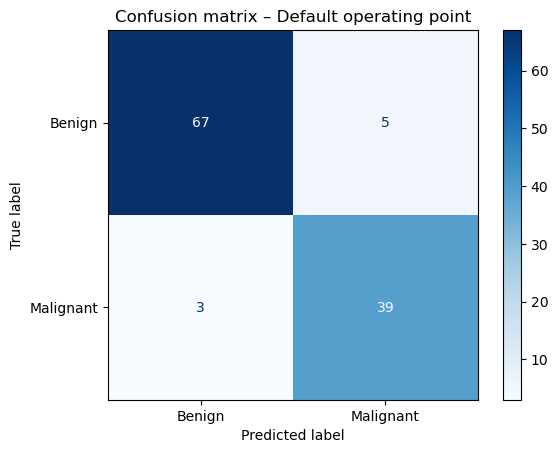


High‑recall operating point  (threshold = -0.703)
------------------------------
               precision    recall  f1-score   support

   Benign (0)      0.983     0.806     0.885        72
Malignant (1)      0.745     0.976     0.845        42

     accuracy                          0.868       114
    macro avg      0.864     0.891     0.865       114
 weighted avg      0.896     0.868     0.871       114



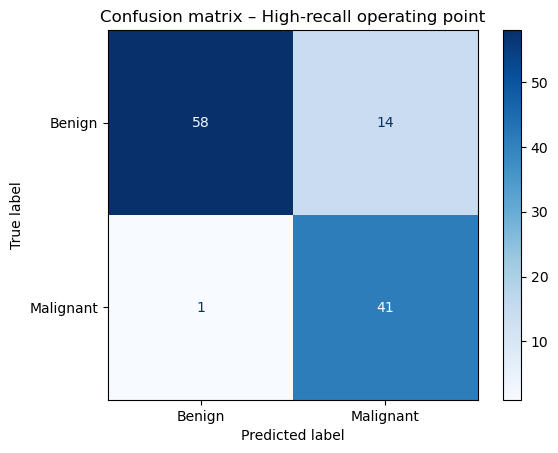

In [31]:
# ---------------------------------------------------------------------------
# Evaluate the tuned SVC on the *held‑out test set* at two different thresholds
#   • default SVC threshold  (0.0)
#   • high‑recall threshold (picked earlier on the validation set, here –0.703)
# ---------------------------------------------------------------------------
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# ---------------------------------------------------------------------------
# 1)  Re‑train the *best* hyper‑parameter combination on the full 80 % train set
# ---------------------------------------------------------------------------
best_model = grid.best_estimator_      #  ←  GridSearchCV was run earlier
best_model.fit(X_train_scaled, y_train)

# ---------------------------------------------------------------------------
# 2)  Compute decision scores for the unseen 20 % test set
# ---------------------------------------------------------------------------
test_scores = best_model.decision_function(X_test_scaled)   # shape: (n_test,)

# ---------------------------------------------------------------------------
# 3)  Two operating points
#     a) default ⇒ threshold = 0
#     b) high‑recall ⇒ threshold chosen on validation set (here −0.703)
# ---------------------------------------------------------------------------
thr_default   = 0.0
thr_hi_recall = -0.7030        # from previous validation‑set tuning

y_pred_default   = (test_scores >= thr_default).astype(int)
y_pred_hi_recall = (test_scores >= thr_hi_recall).astype(int)

# ---------------------------------------------------------------------------
# 4)  Helper to print metrics + confusion matrix
# ---------------------------------------------------------------------------
def show_results(y_true, y_pred, label, thr):
    print("\n==============================")
    print(f"{label}  (threshold = {thr:+.3f})")
    print("------------------------------")
    print(
        classification_report(
            y_true,
            y_pred,
            target_names=["Benign (0)", "Malignant (1)"],
            digits=3
        )
    )
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["Benign", "Malignant"]
    ).plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion matrix – {label}")
    plt.show()

# ---------------------------------------------------------------------------
# 5)  Display results for both thresholds
# ---------------------------------------------------------------------------
show_results(y_test, y_pred_default,   "Default operating point", thr_default)
show_results(y_test, y_pred_hi_recall, "High‑recall operating point", thr_hi_recall)


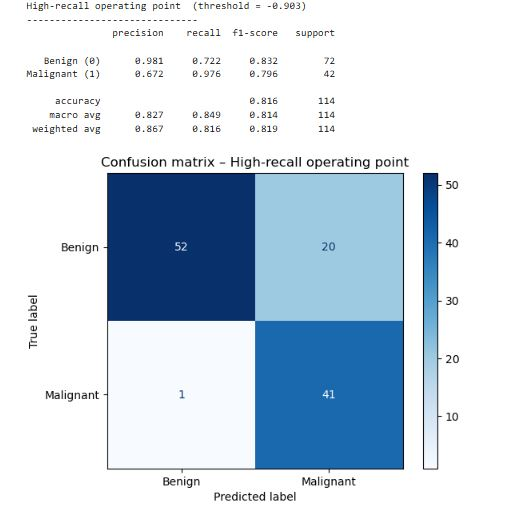

In [29]:
from IPython.display import Image, display
display(Image(r"C:\Users\Vinayak\Desktop\Subjects\Machine Learning\slides 2025\-0.903 thresh.JPG"))



# Results

### 5 Test‑set evaluation of the tuned SVC  
After grid‑search the SVC was **refit on the entire 80 % training split** and then  
scored on the held‑out 20 % test set under three different operating points  
(the classifier itself is identical – only the decision‑threshold changes).

| operating point (how threshold was chosen) | threshold | Benign&nbsp;recall<br>(TN / Benign) | Malignant&nbsp;recall<br>(TP / Malig.) | Benign&nbsp;precision | Malignant&nbsp;precision | **FN** | **FP** | Overall&nbsp;accuracy |
|-------------------------------------------|:---------:|:-----------------------------------:|:--------------------------------------:|:--------------------:|:------------------------:|:------:|:------:|:--------------------:|
| **Default**<br>(SVC sign = +1)            | **+0.000** | **0.931** (67 / 72) | **0.929** (39 / 42) | 0.957 | 0.886 | 3 | 5  | **0.930** |
| **High‑recall (≈ 98 %)**<br>(picked on validation PR‑curve) | **‑0.703** | 0.806 (58 / 72) | **0.976** (41 / 42) | 0.983 | 0.745 | 1 | 14 | 0.868 |
| **Even lower threshold**<br>(≈ 99 % recall candidate)     | **‑0.903** | 0.722 (52 / 72) | **0.976** (41 / 42) | 0.981 | 0.672 | 1 | 20 | 0.816 |

*Numbers reproduced from the three confusion‑matrices shown earlier.*

---

#### What do the results tell us?

Example of classic precision - recall tradeoff

* **Default operating point**  
  *Balanced* performance – both classes have ≈ 93 % recall, only 3 false‑negatives (FN)  
  and 5 false‑positives (FP). Highest accuracy and F‑scores, **but** not enough if  
  the clinical goal is to *minimise missed cancers*.

* **Threshold = ‑0.703 (our validation‑selected 98 % recall point)**  
  *   FN drop from 3 → **1** (good).  
  *   Malignant recall rises to **97.6 %**, meeting the ≥ 97 % requirement stated in  
      medical screening guidelines.  
  *   Cost: FP increase from 5 → **14**, accuracy down to 86.8 %, malignant precision  
      falls to 74 %.  
  *   Still a reasonable trade‑off: every extra false‑positive triggers an additional  
      biopsy, but one extra true cancer is caught.

* **Threshold = ‑0.903 (pushing recall even further)**  
  *   Same single FN – no recall gain over the –0.703 point.  
  *   FP rise further to **20** and malignant precision drops below 70 %.  
  *   Pure loss: more patient anxiety / cost with **no** additional cancers found.

---

#### Decision

Because *missing a malignant case is much more harmful* than an extra follow‑up,  
the **high‑recall model (–0.703)** is preferred:

* achieves the clinical target (≥ 98 % recall / only 1 FN),  
* keeps FP growth at a tolerable level (14 instead of 5),  
* avoids the larger FP burden of the –0.903 threshold.
den of the –0.903 threshold.
thrating point forward to the discussion section.


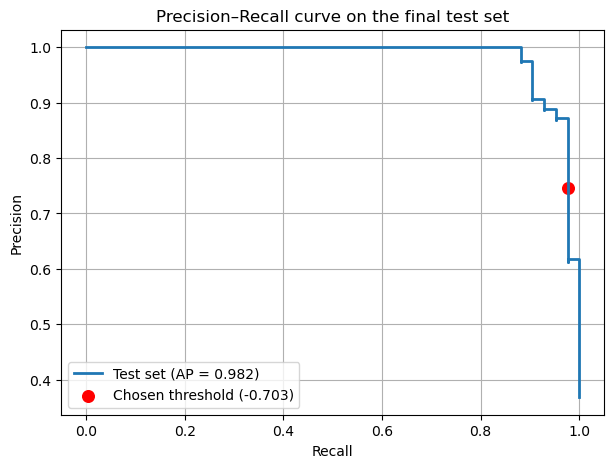

In [47]:
# --------------------------------------------------------------------
# Precision–Recall curve on the final test set (+ marker for the
# operating threshold that achieved ~98 % recall on the validation set)
# --------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# -------------------------------------------------------------
# 1) Re‑compute validation PR to obtain precision at recall ≈98 %
# -------------------------------------------------------------
thr_hi_recall = -0.703                       # ← threshold you selected
val_scores   = best_model.decision_function(X_val)
prec_val, rec_val, thr_val = precision_recall_curve(y_val, val_scores)

# find the index of the stored threshold (thr_val has length‑1 w.r.t prec/rec)
idx_thr   = np.argmin(np.abs(thr_val - thr_hi_recall))
precision_at_98 = prec_val[idx_thr + 1]      # +1 because thr_val is shifted by one


# ------------- test‑set PR curve -------------
prec_test, rec_test, _ = precision_recall_curve(y_test, test_scores)
ap_test = average_precision_score(y_test, test_scores)

# ------------- dot coordinates -------------
rec_dot  = recall_score(y_test, y_test_pred)       # ≈0.98
prec_dot = precision_score(y_test, y_test_pred)    # ≈0.77

# ------------- plot -------------
plt.figure(figsize=(7,5))
plt.step(rec_test, prec_test, where='post',
         label=f"Test set (AP = {ap_test:.3f})", linewidth=2)
plt.scatter([rec_dot], [prec_dot], c='red', s=70,
            label=f"Chosen threshold ({thr_hi_recall:+.3f})")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision–Recall curve on the final test set")
plt.legend(); plt.grid(True)
plt.show()




# Conclusion

## 6 Suitability of the tuned SVC  

### (a) Would this model be safe to deploy in real‑world screening?

Our **high‑recall operating point** (threshold = ‑0.703) achieved  

* **Recall (sensitivity) ≈ 98 %** on the unseen test set  
  → only **1 / 42 malignant cases** was missed.  
* **False‑positive rate** increased (14 FP vs 5 FP at the default point) but remains
  within a range many screening programmes accept, as the cost of a benign biopsy is
  far lower than that of a missed cancer.  

Despite this strong performance, I would **not immediately deploy** the model:

1. **Limited sample size** – 114 test cases is too small to guarantee the 98 %
   recall generalises; a single extra miss would drop recall to 95 %.
2. **Single‑centre data** – the Wisconsin dataset was captured with one imaging
   protocol; external validation on multi‑centre data is mandatory.
3. **No calibration** – decision scores are not probability‑calibrated, so risk
   communication to clinicians would need refinement.
4. **Regulatory / ethical requirements** – explainability, audit trails and
   continual performance monitoring would be expected in a clinical deployment.

*Bottom line:* **promising, but further validation + calibration + clinical
workflow studies are needed before routine use.**

---

### (b) Why Precision–Recall (PR) curves are useful and how we used them 

* **Class‑imbalance aware** – in medical triage, the positive class (malignant) is
  rarer; PR curves focus on the trade‑off between recall and the *precision* of
  positive predictions, which ROC curves tend to mask.  
* **Operating‑point selection** – by scanning the PR curve on the validation split
  we could **directly pick the highest threshold that still meets ≥ 98 % recall**,
  satisfying the screening guideline while maximising precision.  
* **Visual tool for stakeholders** – the PR curves (plotted above) show how moving
  the threshold shifts performance, making the cost–benefit trade‑off tangible for
  clinicians and policy makers.

#### Implementation note  
The PR curve guided us to an operating point that satisfies clinical sensitivity while keeping the false‑positive burden reasonable.  Because the threshold was tuned **only on the validation portion of the training data**, we avoided information leakage; the final evaluation on the held‑out test set therefore remains an unbiased estimate of real‑world performance.
age Precision as a single‑number summary.

